# Tasca M6 T01

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


ds = pd.read_csv('housing data.csv', sep=',', header=None)
df = pd.DataFrame(ds)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


- Se nombrarán las columnas

In [2]:
df.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


**Información de los atributos:**

    1. CRIM: Tasa de criminalidad per cápita por ciudad.
    2. ZN: Proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
    3. INDUS: Proporción de acres comerciales no minoristas por ciudad.
    4. CHAS: Variable ficticia Charles River (= 1 si los límites del tramo río; 0 de lo contrario).
    5. NOX: Concentración de óxidos nítricos (partes por 10 millones).
    6. RM: Promedio de cuartos por vivienda.
    7. AGE: Proporción de las unidades ocupadas por sus propietarios construidas antes de 1940.
    8. DIS: Distancias ponderadas a cinco centros de empleo de Boston.
    9. RAD: Índice de accesibilidad a vías radiales.
    10. TAX: Tasa de impuesto sobre la propiedad de valor total por cada $10,000.
    11. PTRATIO: Ratio alumno-profesor por municipio. Proporción de alumnos por maestro por ciudad
    12. B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad.
    13. LSTAT:porcentaje de la población considerada de menor estatus
    14. MEDV: Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.
    
 - Info de interés: [LINK](https://rpubs.com/TaylorCastro/719068)


- Se realizará un análisis descriptivo 

In [3]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [4]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,0.25651,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,0.00000,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,9.69000,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.00000,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.53800,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,6.20850,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,77.50000,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,3.20745,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,5.00000,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,330.00000,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


- Se analizará si hay registros NaN y nulos. 

In [5]:
df.isna().sum().sort_values(ascending = False)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.isnull().sum().sort_values(ascending = False)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Figure size 432x288 with 0 Axes>

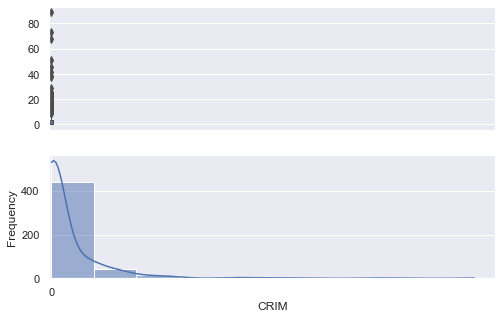

<Figure size 576x360 with 0 Axes>

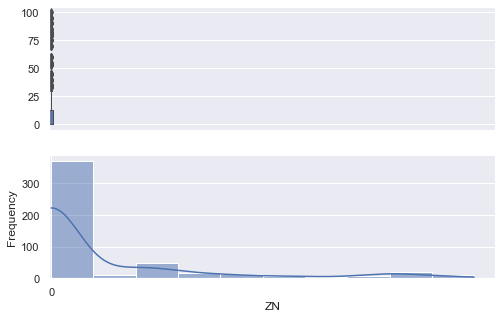

<Figure size 576x360 with 0 Axes>

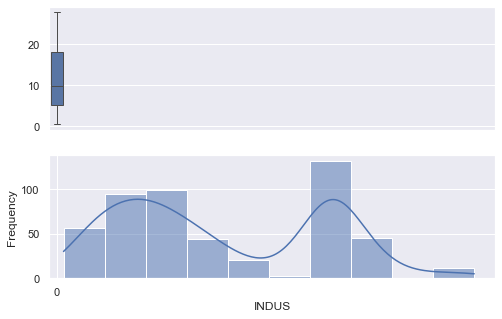

<Figure size 576x360 with 0 Axes>

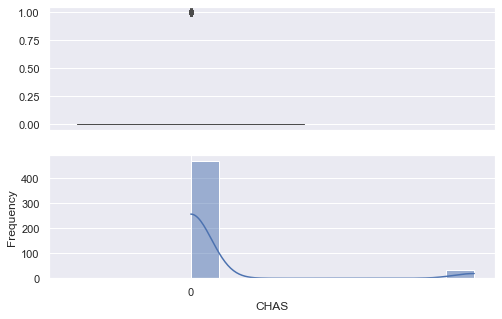

<Figure size 576x360 with 0 Axes>

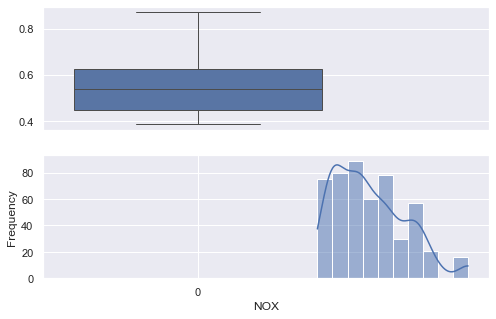

<Figure size 576x360 with 0 Axes>

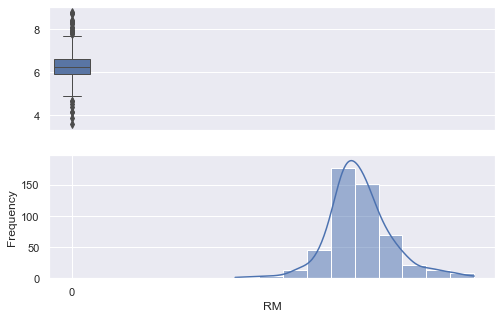

<Figure size 576x360 with 0 Axes>

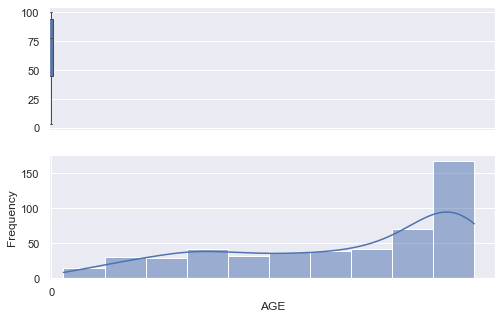

<Figure size 576x360 with 0 Axes>

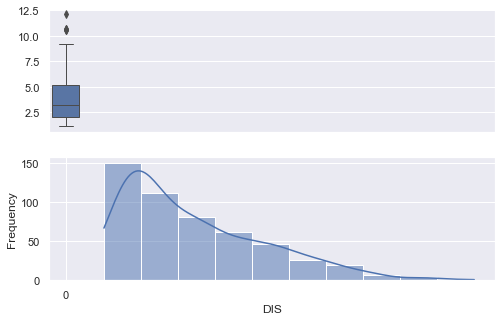

<Figure size 576x360 with 0 Axes>

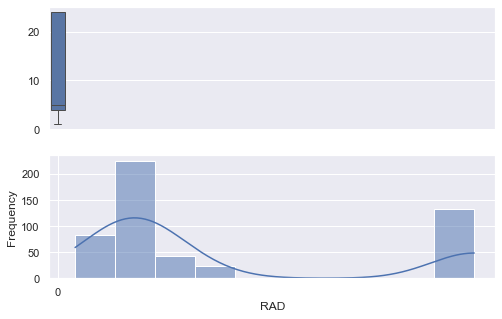

<Figure size 576x360 with 0 Axes>

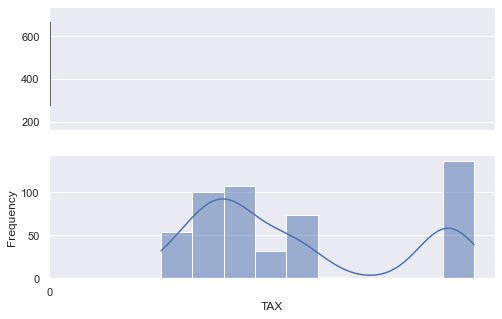

<Figure size 576x360 with 0 Axes>

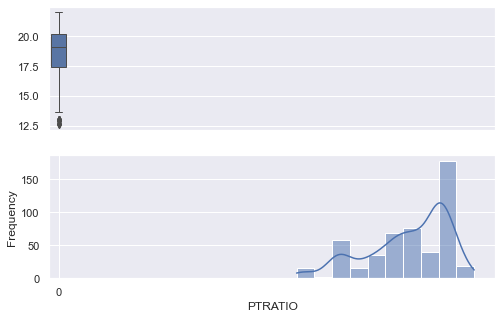

<Figure size 576x360 with 0 Axes>

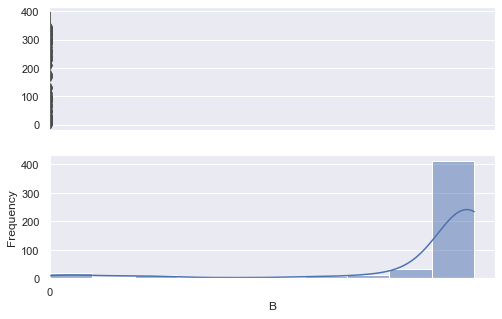

<Figure size 576x360 with 0 Axes>

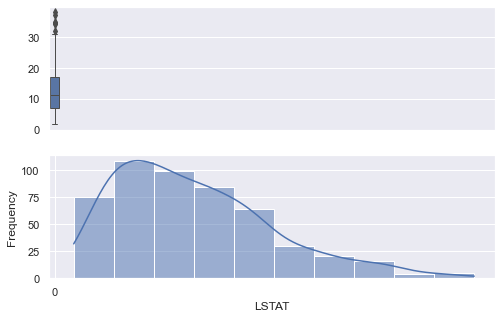

<Figure size 576x360 with 0 Axes>

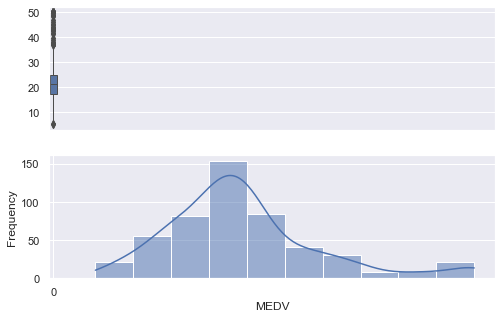

In [7]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

- Se realizará el cálculo de correlación entre las distintas variables del DataFrame, luego se graficará. 

In [8]:
corr = df.corr()
corr.shape

(14, 14)

<AxesSubplot:>

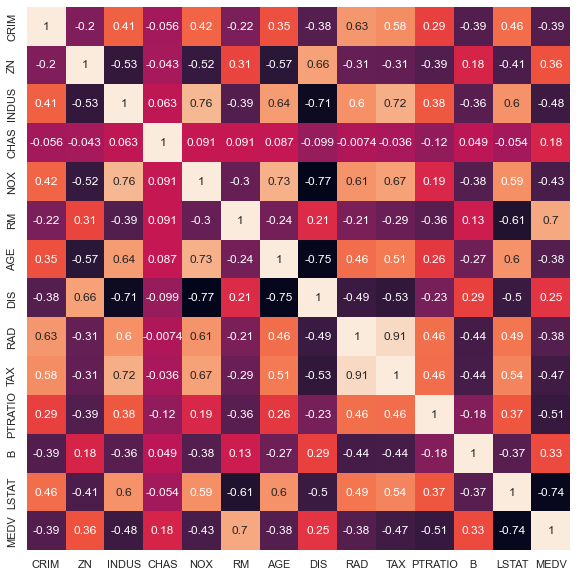

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=False, square= True, annot=True)

En el gráfico se observa:
- una correlación positiva de alta intensidad entre las variables "TAX" (Tasa de impuesto sobre la propiedad de valor total por cada $10,000) y "RAD" (Índice de accesibilidad a vías radiales).
- una correlación negativa de alta intensidad entre "DIS" (Distancias ponderadas a cinco centros de empleo de Boston) y "AGE" (Proporción de las unidades ocupadas por sus propietarios construidas antes de 1940).
- una correlación negativa de alta intensidad entre "LSTAT" (Porcentaje de la población considerada de menor estatus) y "MEDV"(Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares). 
- una correlación negativa de mediana intensidad entre "RAD" (Índice de accesibilidad a vías radiales) y "DIS" (Distancias ponderadas a cinco centros de empleo de Boston).


### Preprocesado
- Se realizará el preprocesado del DataSet para transformar los datos.
- Se utilizará el Test de Shapiro para conocer si los datos tienen distribución normal. 

In [10]:
from scipy import stats

print('Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).')
print('Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
    else:
        print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).
Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable CRIM tiene un p-value=  1.3285678005931464e-36
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable ZN tiene un p-value=  7.882576753156324e-34
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable INDUS tiene un p-value=  1.0642289039786765e-17
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable CHAS tiene un p-value=  2.350467979135232e-40
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable NOX tiene un p-value=  5.775851259944009e-14
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussi

- La variable "CHAS" al ser un dummie ya está lista para un entrenamiento de Machine learning por lo que no se realizará ninguna transformación.
- Aquellas variables que tienen outliers ("CRIM", "ZN", "RM","DIS", "PTRATIO", "B", "LSTAT"), se hará RobustScaler.
- Aquellas variables que no tienen una distribución normal ("INDUS", "NOX", "AGE", "RAD", "TAX"), se hará una normalización.

- Se realizará una copia de DataFrame para poder realizar la transformación de los datos. 

In [11]:
df_pre = df.copy()
df_pre

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


- Se realizará **RobustScaler** a aquellas variables que tiene outliers. 

In [12]:
#RobustScaler para las variables con outliers
robust_col = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
Robust_scaler = preprocessing.RobustScaler().fit(df_pre[robust_col])
df_pre[robust_col] = Robust_scaler.transform(df_pre[robust_col])


df_pre.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,2.31,0,0.538,0.496612,65.2,0.285777,1,296.0,-1.339286,0.261902,-0.637681,24.0
1,-0.063755,0.00,7.07,0,0.469,0.287940,78.9,0.569789,2,242.0,-0.446429,0.261902,-0.221889,21.6
2,-0.063760,0.00,7.07,0,0.469,1.323171,61.1,0.569789,2,242.0,-0.446429,0.066675,-0.732634,34.7
3,-0.062347,0.00,2.18,0,0.458,1.069783,45.8,0.924391,3,222.0,-0.125000,0.153016,-0.841579,33.4
4,-0.052144,0.00,2.18,0,0.458,1.271680,54.2,0.924391,3,222.0,-0.125000,0.261902,-0.602699,36.2


- Se realizará **Normalización** a aquellas variables que no tienen distribución normal. 

In [13]:
#Normalización para las variables que no tienen distribución normal
norm_col = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']
norm_scaler = preprocessing.MinMaxScaler().fit(df_pre[norm_col])
df_pre[norm_col] = norm_scaler.transform(df_pre[norm_col])

df_pre.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.000000,0.208015,-1.339286,0.261902,-0.637681,24.0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.043478,0.104962,-0.446429,0.261902,-0.221889,21.6
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.043478,0.104962,-0.446429,0.066675,-0.732634,34.7
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.086957,0.066794,-0.125000,0.153016,-0.841579,33.4
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.086957,0.066794,-0.125000,0.261902,-0.602699,36.2


<Figure size 576x360 with 0 Axes>

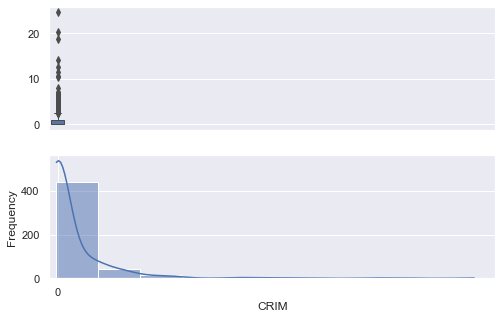

<Figure size 576x360 with 0 Axes>

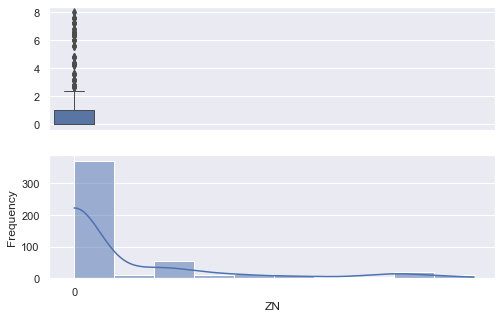

<Figure size 576x360 with 0 Axes>

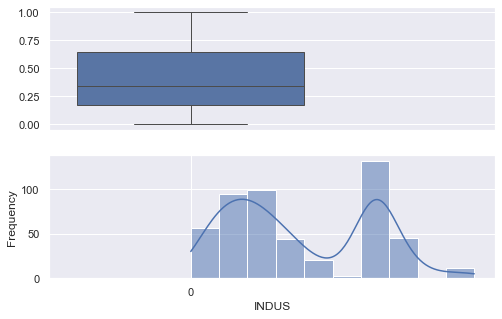

<Figure size 576x360 with 0 Axes>

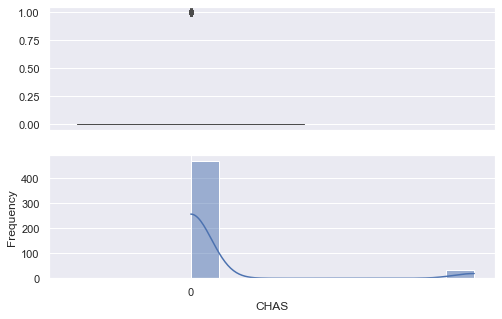

<Figure size 576x360 with 0 Axes>

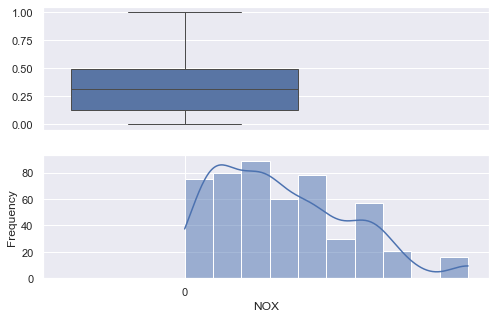

<Figure size 576x360 with 0 Axes>

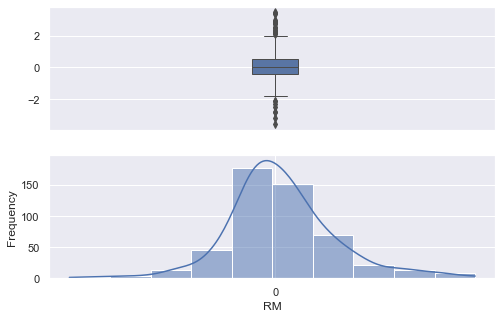

<Figure size 576x360 with 0 Axes>

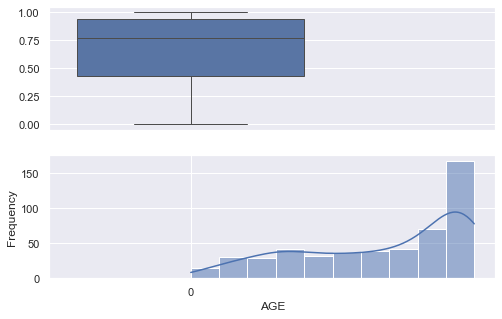

<Figure size 576x360 with 0 Axes>

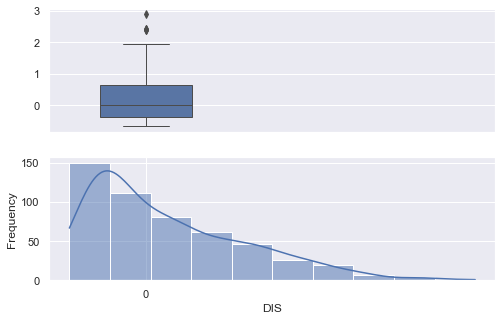

<Figure size 576x360 with 0 Axes>

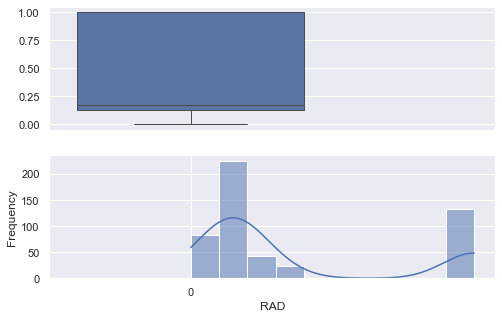

<Figure size 576x360 with 0 Axes>

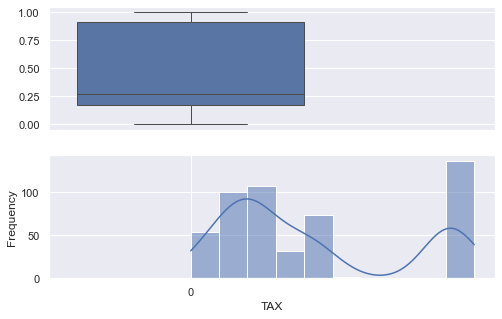

<Figure size 576x360 with 0 Axes>

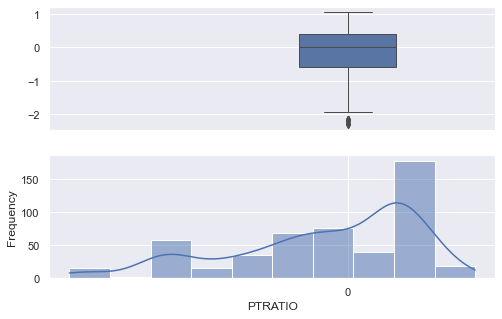

<Figure size 576x360 with 0 Axes>

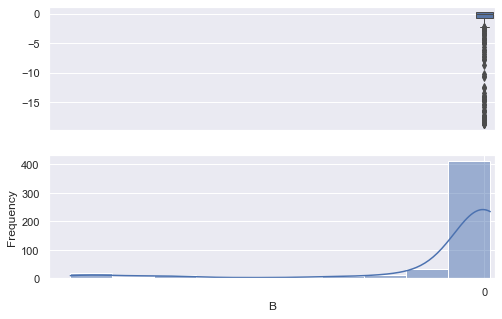

<Figure size 576x360 with 0 Axes>

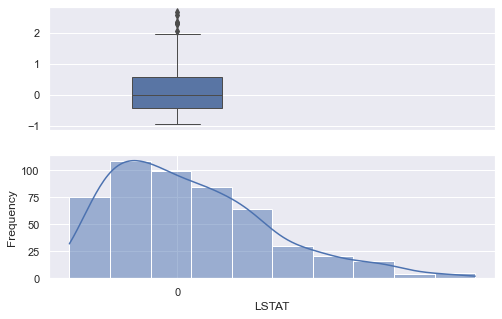

<Figure size 576x360 with 0 Axes>

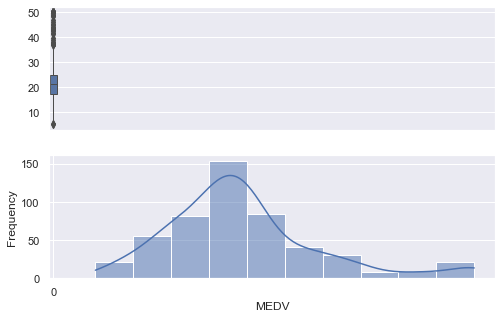

In [14]:
for i in df_pre.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_pre[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df_pre[i], ax=ax_hist , bins = 10,kde=True)

In [15]:
df_ml = df_pre.copy()

- Se realizará la división del DataFrame en Features y Target. 
- El Target será la columna "MEDV": Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

In [16]:
x = df_ml.drop(columns='MEDV')

y = df_ml[['MEDV']]
print(x.shape, y.shape)

#otra sintaxis
#x = df.drop(['MEDV'],axis=1)

#y = df[['MEDV']]
#print(x.shape, y.shape)

(506, 13) (506, 1)


- Se realizará la división del DataFrame en dos sets: Training y Data (Train Test Split). La división será del 80% para el Train y 20% para el Test.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = 0.80)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


## Exercici 1

Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

### Linear Regression

Se elegirá el modelo de **Regresión Lineal** 

In [18]:
#Instanciar
lr = LinearRegression()


#Entrenar
lr.fit(x_train,y_train)

LinearRegression()

- Se definirá la variable para predecir el objetivo del test "y_test" 
- Se le dará la información con la que no se ha entrenado "x_test"

In [19]:
pred_lr = lr.predict(x_test) 

#Predigo los 5 primeros valores de MEDV (y_test)
pred_lr[:5]

array([[24.88963777],
       [23.72141085],
       [29.36499868],
       [12.12238621],
       [21.44382254]])

In [20]:
# vemos los parámetros que ha estimado la regresión lineal
print('w =', str(lr.coef_))

w = [[-0.42940367  0.55974939  0.14963794  2.34080361 -7.8360717   2.73702725
  -0.30305704 -4.28154168  5.61610152 -5.75856956 -2.92857933  0.16907545
  -4.93039121]]


In [21]:
print('b=', str(lr.intercept_))

b= [26.26647312]


### Random Forest

Se elegirá el modelo de **Random Forest** 

In [22]:
#Instanciar 
rf = RandomForestRegressor()

#Entrenar
rf.fit(x_train, y_train)

RandomForestRegressor()

- Se definirá la variable para predecir el objetivo del test "y_test" 
- Se le dará la información con la que no se ha entrenado "x_test"

In [23]:
pred_rf = rf.predict(x_test) 

#Predigo los 5 primeros valores de MEDV (y_test)
pred_rf[:5]

array([24.177, 28.629, 21.958, 11.093, 21.068])

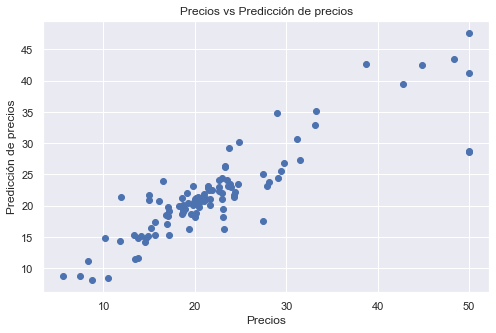

In [24]:
plt.scatter(y_test, pred_rf)  
plt.xlabel('Precios')  
plt.ylabel('Predicción de precios') 
plt.title('Precios vs Predicción de precios') 
plt.show()

## Exercici 2

Compara’ls en base al MSE i al R2.

**R2**

Score R2 es una métrica muy importante que se utiliza para evaluar el rendimiento de un modelo de aprendizaje automático basado en regresión. También se le conoce como coeficiente de determinación. Funciona midiendo la cantidad de variación en las predicciones explicadas por el conjunto de datos. En pocas palabras, es la diferencia entre las muestras en el conjunto de datos y las predicciones hechas por el modelo.

In [25]:
#Instancializar r2 para los dos modelos
r2_lr = r2_score(y_test, pred_lr)
r2_rf = r2_score(y_test, pred_rf)
print('Score R2 para el modelo Linear Regression es: %.3f'% r2_lr,
      '\nScore R2 para el modelo Random Forest es: %.3f'% r2_rf)

Score R2 para el modelo Linear Regression es: 0.589 
Score R2 para el modelo Random Forest es: 0.772


**MSE**

El error cuadrático medio (MSE) te dice qué tan cerca está una línea de regresión de un conjunto de puntos. Lo hace tomando las distancias desde los puntos hasta la línea de regresión (estas distancias son los "errores") y elevándolas al cuadrado. La cuadratura es necesaria para eliminar cualquier signo negativo. También da más peso a las diferencias más grandes. Se llama el error cuadrático medio ya que estás encontrando el promedio de un conjunto de errores. Cuanto menor sea el MSE, mejor será el pronóstico.

In [26]:
mse_lr = mean_squared_error(y_test, pred_lr)
mse_rf = mean_squared_error(y_test, pred_rf)
print('Error cuadrático medio (MSE) del subconjunto del train del modelo Linear Regression:%.3f'% mse_lr, 
      '\nError cuadrático medio (MSE) del subconjunto del train del modelo Randon Forest:%.3f'% mse_rf)

Error cuadrático medio (MSE) del subconjunto del train del modelo Linear Regression:33.449 
Error cuadrático medio (MSE) del subconjunto del train del modelo Randon Forest:18.542


In [27]:
metrics = pd.DataFrame( data = [['Linear Regression', r2_lr, mse_lr],
                                  ['Randon Forest', r2_rf, mse_rf]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics.head()

,Model,R2,MSE
0,Linear Regression,0.589222,33.448980
1,Randon Forest,0.772295,18.541697


Se puede observar que el modelo de Random Forest es más eficiente que el Linear Regression, con un R2 del 74,49% contra el 58,9%, y con un error cuadrático más bajo (20,76 contra 33,44).

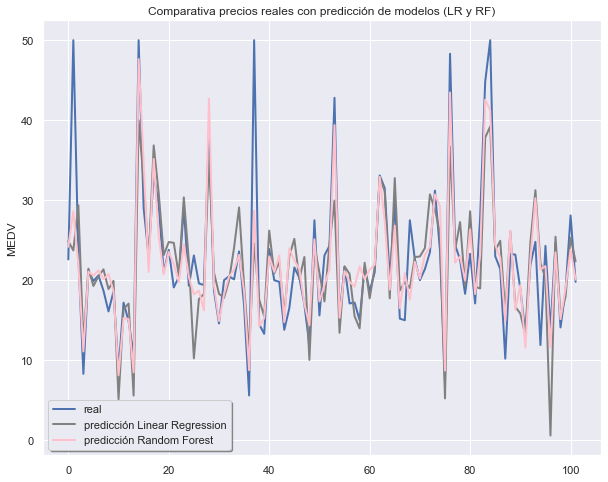

In [28]:
plt.figure(figsize = (10,8))
pred = range(len(y_test))
plt.plot(pred, y_test.iloc[:].values, linewidth=2, label='real')
plt.plot(pred, pred_lr, linewidth=2., label='predicción Linear Regression', c='grey')
plt.plot(pred, pred_rf, linewidth=2, label='predicción Random Forest', c='pink')
plt.title('Comparativa precios reales con predicción de modelos (LR y RF)')
plt.ylabel('MEDV')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Se puede observar tanto en la tabla de resultados como en la gráfica que el modelo que predice mejores resultados es el Random Forest, con un R2 = 74,49% y un valor de MSE = 20.76.

R Square/R Square ajustado se usa mejor para explicar el modelo a otras personas porque puede explicar el número como un porcentaje de la variabilidad de salida. Es mejor utilizar MSE, RMSE o MAE para comparar el rendimiento entre diferentes modelos de regresión. Personalmente, preferiría usar RMSE y creo que Kaggle también lo usa para evaluar la presentación. Sin embargo, tiene mucho sentido utilizar MSE si el valor no es demasiado grande y MAE si no desea penalizar grandes errores de predicción.

El cuadrado R ajustado es la única métrica aquí que considera el problema de sobreajuste.
[LINK](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b)

- Se realizará el calculo del **Accuracy** para conocer la fracción de predicciones que el modelo realizó correctamente. Se representa como un porcentaje o un valor entre 0 y 1.

In [29]:
print('Model Accuracy Linear Regression:%.3f'% r2_score(lr.predict(x_test),y_test), 
      '\nModel Accuracy Random Forest:%.3f'% r2_score(rf.predict(x_test), y_test))

Model Accuracy Linear Regression:0.352 
Model Accuracy Random Forest:0.652


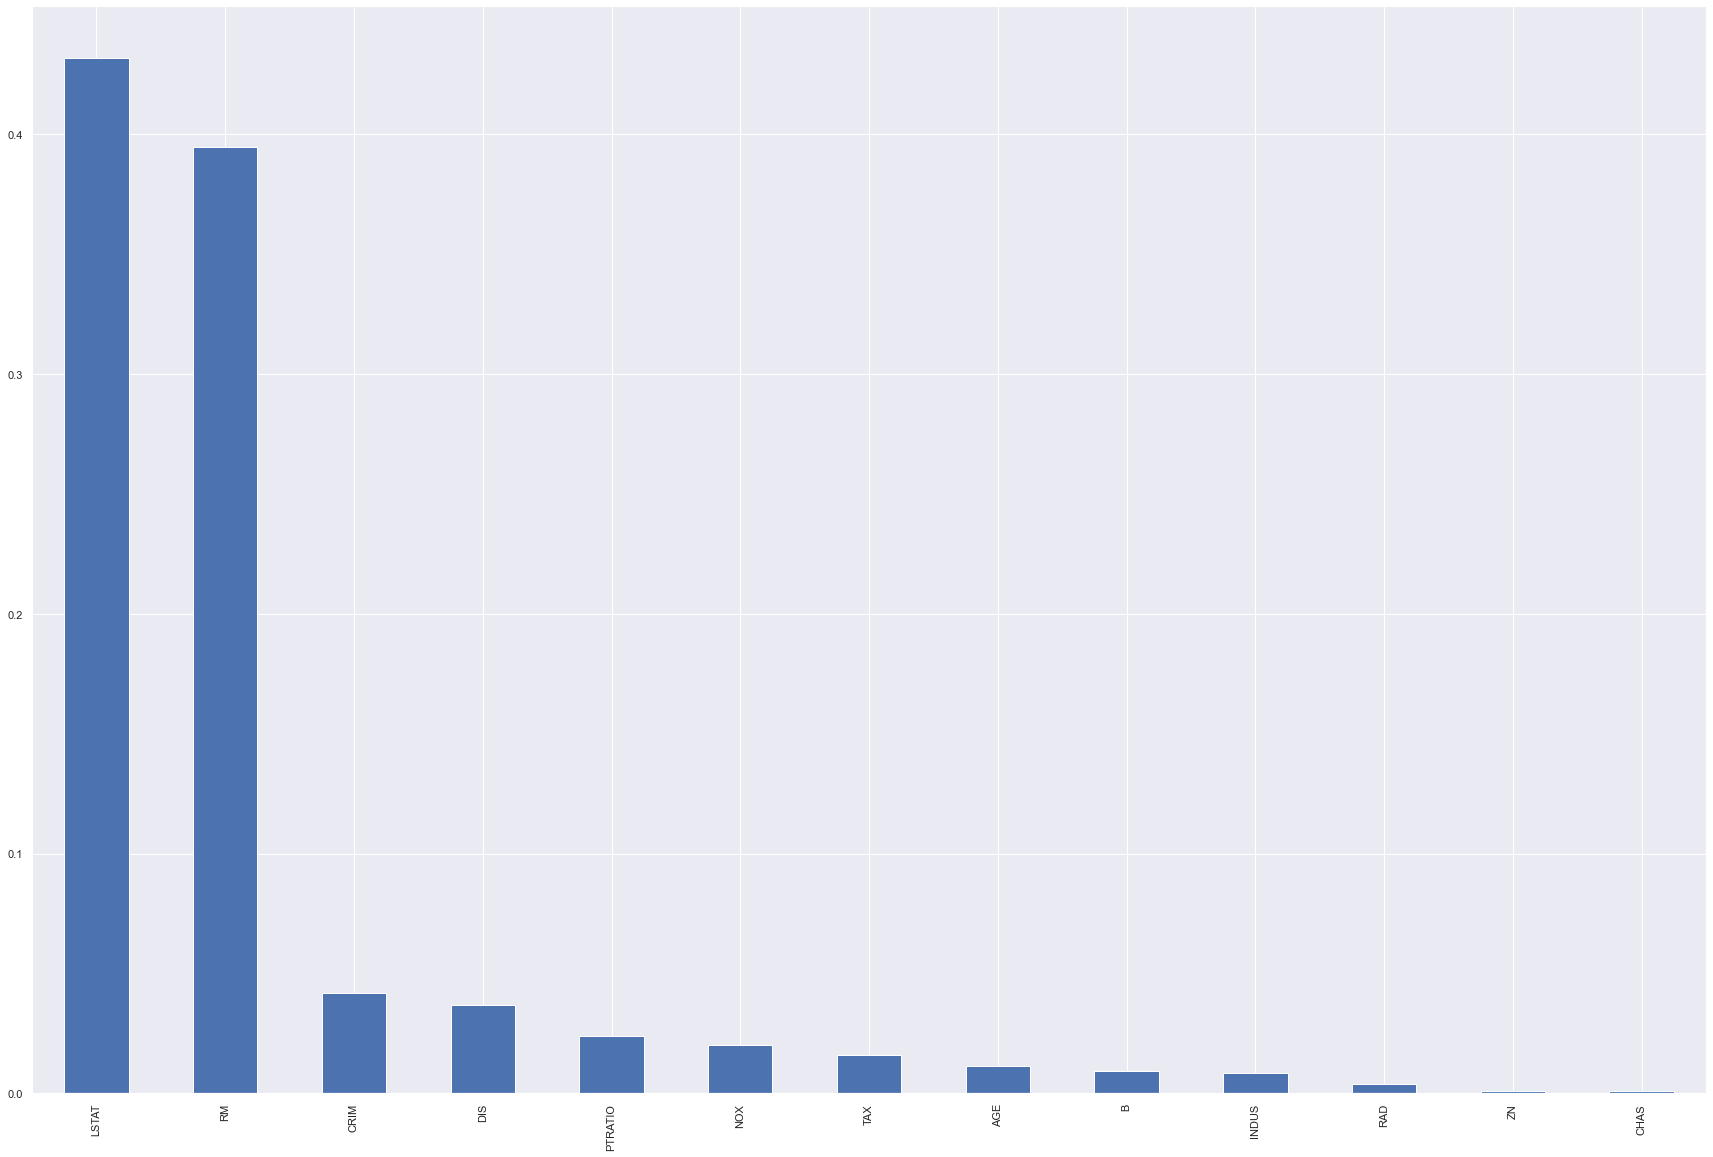

In [30]:
pd.Series(rf.feature_importances_,index = x_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

En este gráfico se pueden observar aquellas variables que tienen mayor y menor importancia a la hora de predecir el precio. LAs de mayor importancia son: "LSTAT" (Porcentaje de la población considerada de menor estatus) y "RM" (Promedio de cuartos por vivienda).

## Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

### LINEAR REGRESSION

In [31]:
#parametros de linear Regression
lr.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [32]:
from pprint import pprint

#Parámetros actualmente en uso
print('Parámetros actualmente en uso:\n')
pprint(lr.get_params())


Parámetros actualmente en uso:

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}


In [33]:
#Parameter search
from sklearn.model_selection import GridSearchCV

# lista de diccionarios, con nombres de parámetros (str)
param_grid = dict()
param_grid['copy_X'] = [True, False]
param_grid['fit_intercept'] = [True, False]
param_grid['positive'] = [True, False]

search = GridSearchCV(lr, param_grid)

result = search.fit(x_train, y_train)

print('Mejores Hyperparametros:', result.best_params_)

Mejores Hyperparametros: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [34]:
lr_bp = LinearRegression(copy_X= True, fit_intercept= True, positive= False)
lr_bp.fit(x_train,y_train)

# make predictions
lr_bp_pred = lr_bp.predict(x_test)

# evaluate predictions
r2_lr_bp = r2_score(y_test, lr_bp_pred)
mse_lr_bp = mean_squared_error(y_test, lr_bp_pred)


print('R2: %.3f' % r2_lr_bp)
print('MSE: %.3f' % mse_lr_bp)

R2: 0.589
MSE: 33.449


- Se observa que según GridSearch los mejores parametros son iguales a los parámetros que se dan por defecto, por lo tanto los resultados del R2 y MSE son iguales. 

### RANDOM FOREST 

In [35]:
#parametros de randon forest
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [36]:
rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parámetros actualmente en uso:\n')
pprint(rf.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [37]:
from sklearn.model_selection import RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

rf = RandomForestRegressor(random_state = 42)

rf_random = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=2, 
                                random_state=42, 
                                n_jobs = -1)


rf_random.fit(x,y.values.ravel())

rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [38]:
rf_bp = RandomForestRegressor(n_estimators=800,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                              max_features='auto', max_depth=100, bootstrap= True).fit(x_train, y_train)
y_pred_rf_bp = rf_bp.predict(x_test)

r2_rf_bp = r2_score(y_test, y_pred_rf_bp)
mse_rf_bp = mean_squared_error(y_test, y_pred_rf_bp)

print('R2 Random Forest Best Parameters= %.3f' % r2_rf_bp, '\nMSE Random Forest Best Parameters= %.3f' % mse_rf_bp)


R2 Random Forest Best Parameters= 0.771 
MSE Random Forest Best Parameters= 18.640


In [39]:
metrics = pd.DataFrame( data = [['Linear Regression', r2_lr, mse_lr],
                                  ['Random Forest', r2_rf, mse_rf],
                                  ['Random Forest Best Parameters', r2_rf_bp, mse_rf_bp]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics.head()

,Model,R2,MSE
0,Linear Regression,0.589222,33.448980
1,Random Forest,0.772295,18.541697
2,Random Forest Best Parameters,0.771087,18.640027


- El modelo LR "Linear Regression" no sufre ningún cambio.
- El modelo RF "Random Forest" tiene una pequeña mejoría en R2 y MSE. 
- El mejor modelo en este caso es el de Random Forest. 

## Exercici 4

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

In [40]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(lr, x, y, cv=7, scoring='r2')
cv_rf = cross_val_score(rf, x, y, cv=7, scoring='r2')
cv_rf_bp = cross_val_score(rf_bp, x, y, cv=7, scoring='r2')

In [41]:
cv_mean = [cv_lr.mean(), cv_rf.mean(), cv_rf_bp.mean()]
metrics['R2 con Cross Validation'] = cv_mean
metrics.head()

metrics.head()

,Model,R2,MSE,R2 con Cross Validation
0,Linear Regression,0.589222,33.448980,0.450594
1,Random Forest,0.772295,18.541697,0.655881
2,Random Forest Best Parameters,0.771087,18.640027,0.659313


## Exercici 5

No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [42]:
x1 = df.drop(['RM','MEDV'],axis=1)

x1_train, x1_test, y_train, y_test = train_test_split(x1, y, random_state=0, train_size = 0.80)

print(x1_train.shape, x1_test.shape, y_train.shape, y_test.shape)

(404, 12) (102, 12) (404, 1) (102, 1)


In [43]:
lr1 = LinearRegression().fit(x1_train, y_train)
pred_lr1 = lr1.predict(x1_test)
r2_lr1 = r2_score(y_test, pred_lr1)
mse_lr1 = mean_squared_error(y_test, pred_lr1)

rf1 = RandomForestRegressor().fit(x1_train, y_train)
pred_rf1 = rf1.predict(x1_test)
r2_rf1 = r2_score(y_test, pred_rf1)
mse_rf1 = mean_squared_error(y_test, pred_rf1)


print('El R2 del modelo Linear Regression sin la variable RM es: %.3f' % r2_lr1,
      '\nEl R2 del modelo Random Forest sin la variable RM es: %.3f' % r2_rf1,
      '\nEl MSE del modelo Linear Regression sin la variable RM es: %.3f' % mse_lr1,
      '\nEl MSE del modelo Random Forest sin la variable RM es:%.3f' % mse_rf1)

El R2 del modelo Linear Regression sin la variable RM es: 0.525 
El R2 del modelo Random Forest sin la variable RM es: 0.630 
El MSE del modelo Linear Regression sin la variable RM es: 38.664 
El MSE del modelo Random Forest sin la variable RM es:30.142


- Mejorando el modelo **Linear Regression** sin "RM" 

In [44]:
#parametros de linear Regression
lr1.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [45]:
#Parámetros actualmente en uso
print('Parámetros actualmente en uso:\n')
pprint(lr1.get_params())


Parámetros actualmente en uso:

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}


In [46]:
# lista de diccionarios, con nombres de parámetros (str)
param_grid1 = dict()
param_grid1['copy_X'] = [True, False]
param_grid1['fit_intercept'] = [True, False]
param_grid1['positive'] = [True, False]

search1 = GridSearchCV(lr1, param_grid1)

result1 = search1.fit(x1_train, y_train)

print('Mejores Hyperparametros:', result1.best_params_)

Mejores Hyperparametros: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [47]:
lr1_bp = LinearRegression(copy_X= True, fit_intercept= True, positive= False)
lr1_bp.fit(x1_train,y_train)

# make predictions
lr1_bp_pred = lr1_bp.predict(x1_test)

# evaluate predictions
r2_lr1_bp = r2_score(y_test, lr1_bp_pred)
mse_lr1_bp = mean_squared_error(y_test, lr1_bp_pred)


print('R2: %.3f' % r2_lr1_bp)
print('MSE: %.3f' % mse_lr1_bp)

R2: 0.525
MSE: 38.664


- Mejorando el modelo **Random Forest**  sin "RM"

In [48]:
#parametros de randon forest
rf1.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [49]:
rf1 = RandomForestRegressor(random_state = 42)


# Look at parameters used by our current forest
print('Parámetros actualmente en uso:\n')
pprint(rf1.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [50]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid1 = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

rf1 = RandomForestRegressor(random_state = 42)

rf1_random = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=2, 
                                random_state=42, 
                                n_jobs = -1)


rf1_random.fit(x,y.values.ravel())

rf1_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [51]:
rf1_bp = RandomForestRegressor(n_estimators=800,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                              max_features='auto', max_depth=100, bootstrap= True).fit(x1_train, y_train)
pred_rf1_bp = rf1_bp.predict(x1_test)

r2_rf1_bp = r2_score(y_test, pred_rf1_bp)
mse_rf1_bp = mean_squared_error(y_test, pred_rf1_bp)

print('R2 Random Forest Best Parameters= %.3f' % r2_rf1_bp, '\nMSE Random Forest Best Parameters= %.3f' % mse_rf1_bp)


R2 Random Forest Best Parameters= 0.631 
MSE Random Forest Best Parameters= 30.022


In [52]:
metrics_rm = pd.DataFrame({'Model': ['Linear Regression', 'Linear Regression sin "RM"','Linear Regression Best Parameters','Random Forest','Random Forest sin "RM"','Random Forest Best Parameters'],
                        'R2': [r2_lr, r2_lr1, r2_lr1_bp, r2_rf, r2_rf1,r2_rf1_bp], 
                        'MSE': [mse_lr,mse_lr1, mse_lr1_bp, mse_rf,mse_rf1, mse_rf1_bp]})
metrics_rm

#pd.concat([metrics, metrics_rm], axis=0)

,Model,R2,MSE
0,Linear Regression,0.589222,33.448980
1,"Linear Regression sin ""RM""",0.525174,38.664359
2,Linear Regression Best Parameters,0.525174,38.664359
3,Random Forest,0.772295,18.541697
4,"Random Forest sin ""RM""",0.629829,30.142476
5,Random Forest Best Parameters,0.631310,30.021829


    - Se puede observar que la variable "RM" (Promedio de cuartos por vivienda) es muy importante, quitarla tiene gran impacto en los resultados y empeora el modelo.  

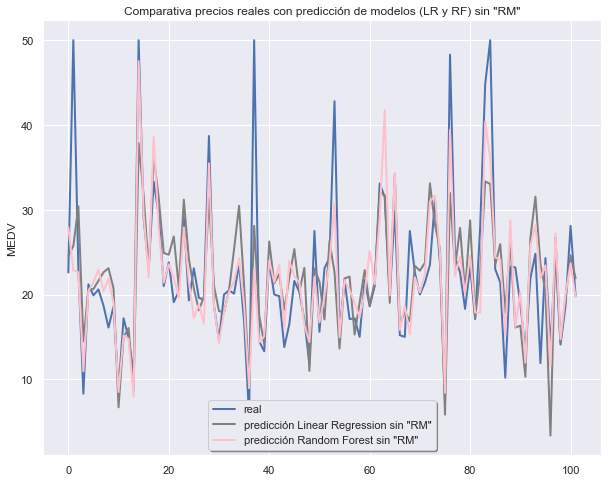

In [53]:
plt.figure(figsize = (10,8))
pred1 = range(len(y_test))
plt.plot(pred1, y_test.iloc[:].values, linewidth=2, label='real')
plt.plot(pred1, pred_lr1, linewidth=2., label='predicción Linear Regression sin "RM"', c='grey')
plt.plot(pred1, pred_rf1, linewidth=2, label='predicción Random Forest sin "RM"', c='pink')
plt.title('Comparativa precios reales con predicción de modelos (LR y RF) sin "RM"')
plt.ylabel('MEDV')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()